<a href="https://colab.research.google.com/github/arjunverma2004/CampusX-100-Days-of-Deep-Learning/blob/main/Practice_code/Kaggle_house_prediction_2prac_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.columns

Index(['id', 'sale_date', 'sale_price', 'sale_nbr', 'sale_warning',
       'join_status', 'join_year', 'latitude', 'longitude', 'area', 'city',
       'zoning', 'subdivision', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt',
       'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full',
       'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf',
       'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics',
       'view_cascades', 'view_territorial', 'view_skyline', 'view_sound',
       'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other',
       'submarket'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 non-null  int64  
 16  year_built        20

In [5]:
df['submarket'].value_counts()

,count
submarket,
K,21002
B,16289
I,15842
R,14404
Q,14005
O,12528
D,12404
F,12401
M,10722


# Task
Clean the data.

## Handle missing values

### Subtask:
Identify and address missing values in the dataset.


**Reasoning**:
Calculate and display the percentage of missing values for each column to identify which columns require handling.



In [6]:
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])

Percentage of missing values per column:
sale_nbr       21.0910
subdivision     8.7750
submarket       0.8585
dtype: float64


**Reasoning**:
Based on the missing value percentages, 'sale_nbr' has a significant percentage (21.0910%), 'subdivision' has 8.7750%, and 'submarket' has a small percentage (0.8585%). Since 'sale_nbr' is a numerical column with a substantial amount of missing data, imputing with the median is a reasonable approach to avoid skewing the distribution. 'subdivision' and 'submarket' are categorical columns with a moderate and low percentage of missing values respectively. Imputing with the mode for these columns is appropriate as it fills missing values with the most frequent category. After imputation, verify that all missing values have been handled.



In [7]:
df['sale_nbr'].fillna(df['sale_nbr'].median(), inplace=True)
df['subdivision'].fillna(df['subdivision'].mode()[0], inplace=True)
df['submarket'].fillna(df['submarket'].mode()[0], inplace=True)

missing_percentage_after = df.isnull().sum() / len(df) * 100
print("\nPercentage of missing values per column after handling:")
print(missing_percentage_after[missing_percentage_after > 0])


Percentage of missing values per column after handling:
Series([], dtype: float64)


/tmp/ipython-input-7-3805654652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sale_nbr'].fillna(df['sale_nbr'].median(), inplace=True)
/tmp/ipython-input-7-3805654652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

## Correct data types

### Subtask:
Convert columns to appropriate data types if necessary.


**Reasoning**:
Convert the 'sale_date' column to datetime objects and verify the data types.



In [8]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                200000 non-null  int64         
 1   sale_date         200000 non-null  datetime64[ns]
 2   sale_price        200000 non-null  int64         
 3   sale_nbr          200000 non-null  float64       
 4   sale_warning      200000 non-null  object        
 5   join_status       200000 non-null  object        
 6   join_year         200000 non-null  int64         
 7   latitude          200000 non-null  float64       
 8   longitude         200000 non-null  float64       
 9   area              200000 non-null  int64         
 10  city              200000 non-null  object        
 11  zoning            200000 non-null  object        
 12  subdivision       200000 non-null  object        
 13  present_use       200000 non-null  int64         
 14  land

## Identify and handle outliers

### Subtask:
Detect and handle outliers that could skew analysis.


**Reasoning**:
Select the numerical columns for outlier detection, calculate IQR, and determine outlier bounds for each selected column. Then, cap the outliers at the calculated bounds. Finally, display descriptive statistics before and after capping to show the effect of outlier handling.



In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that are likely identifiers or categorical/binary flags
exclude_cols = ['id', 'sale_nbr', 'join_year', 'present_use', 'grade', 'fbsmt_grade', 'condition',
                'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'wfnt', 'golf',
                'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades',
                'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
                'view_otherwater', 'view_other']

numerical_cols_for_outliers = [col for col in numerical_cols if col not in exclude_cols]

print("Numerical columns selected for outlier handling:")
print(numerical_cols_for_outliers)

# Store original descriptive statistics for comparison
original_desc = df[numerical_cols_for_outliers].describe()

# Cap outliers using 1.5 * IQR
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # Cap values above the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Store descriptive statistics after capping
capped_desc = df[numerical_cols_for_outliers].describe()

print("\nDescriptive Statistics Before Outlier Capping:")
display(original_desc)

print("\nDescriptive Statistics After Outlier Capping:")
display(capped_desc)

Numerical columns selected for outlier handling:
['sale_price', 'latitude', 'longitude', 'area', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'garb_sqft', 'gara_sqft']

Descriptive Statistics Before Outlier Capping:


,sale_price,latitude,longitude,area,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,garb_sqft,gara_sqft
count,2.000000e+05,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,5.841495e+05,47.549248,-122.210416,48.644215,4.601691e+05,4.917715e+05,1974.184760,59.468830,1.378310e+04,2120.679850,1251.284280,293.238535,80.32632,274.151470
std,4.170595e+05,0.142710,0.140339,27.132002,3.510444e+05,3.680505e+05,30.544426,339.334129,3.793152e+04,909.799433,468.094648,443.577947,180.13173,288.338763
min,5.029300e+04,47.155200,-122.527700,1.000000,0.000000e+00,0.000000e+00,1900.000000,0.000000,3.750000e+02,0.000000,1.000000,0.000000,0.00000,0.000000
25%,3.050000e+05,47.446500,-122.323800,26.000000,2.310000e+05,2.800000e+05,1953.000000,0.000000,5.000000e+03,1460.000000,950.000000,0.000000,0.00000,0.000000
50%,4.599500e+05,47.562800,-122.222700,48.000000,3.770000e+05,4.090000e+05,1978.000000,0.000000,7.438000e+03,1970.000000,1200.000000,0.000000,0.00000,240.000000
75%,7.249500e+05,47.673500,-122.121700,71.000000,5.940000e+05,5.990000e+05,2001.000000,0.000000,1.022000e+04,2610.000000,1470.000000,570.000000,0.00000,480.000000
max,2.999950e+06,47.777800,-121.161300,100.000000,1.386400e+07,1.006700e+07,2025.000000,2024.000000,2.310573e+06,13540.000000,7760.000000,5480.000000,12740.00000,4404.000000



Descriptive Statistics After Outlier Capping:


,sale_price,latitude,longitude,area,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,garb_sqft,gara_sqft
count,2.000000e+05,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,5.566786e+05,47.549248,-122.211390,48.644215,4.425073e+05,4.647826e+05,1974.184760,0.0,8307.503665,2103.913120,1236.157880,286.434385,0.0,273.358440
std,3.294715e+05,0.142710,0.136898,27.132002,2.751638e+05,2.770109e+05,30.544426,0.0,4670.247582,851.265247,416.496573,420.252534,0.0,284.657285
min,5.029300e+04,47.155200,-122.527700,1.000000,0.000000e+00,0.000000e+00,1900.000000,0.0,375.000000,0.000000,170.000000,0.000000,0.0,0.000000
25%,3.050000e+05,47.446500,-122.323800,26.000000,2.310000e+05,2.800000e+05,1953.000000,0.0,5000.000000,1460.000000,950.000000,0.000000,0.0,0.000000
50%,4.599500e+05,47.562800,-122.222700,48.000000,3.770000e+05,4.090000e+05,1978.000000,0.0,7438.000000,1970.000000,1200.000000,0.000000,0.0,240.000000
75%,7.249500e+05,47.673500,-122.121700,71.000000,5.940000e+05,5.990000e+05,2001.000000,0.0,10220.000000,2610.000000,1470.000000,570.000000,0.0,480.000000
max,1.354875e+06,47.777800,-121.818550,100.000000,1.138500e+06,1.077500e+06,2025.000000,0.0,18050.000000,4335.000000,2250.000000,1425.000000,0.0,1200.000000


**Reasoning**:
Visualize the distributions of some key numerical features after capping to observe the effect of outlier handling. Create histograms or box plots for a few selected columns.



**Reasoning**:
The previous code failed because I was trying to plot the descriptive statistics DataFrame itself, not the original DataFrame or the capped DataFrame. I need to plot the distributions from the actual data in `df` before and after capping.



**Reasoning**:
The previous code failed because `original_df` was not defined. I need to create a copy of the DataFrame before capping the outliers to be able to plot the distributions before the modification.



Numerical columns selected for outlier handling:
['sale_price', 'latitude', 'longitude', 'area', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'garb_sqft', 'gara_sqft']

Descriptive Statistics Before Outlier Capping:


,sale_price,latitude,longitude,area,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,garb_sqft,gara_sqft
count,2.000000e+05,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,5.566786e+05,47.549248,-122.211390,48.644215,4.425073e+05,4.647826e+05,1974.184760,0.0,8307.503665,2103.913120,1236.157880,286.434385,0.0,273.358440
std,3.294715e+05,0.142710,0.136898,27.132002,2.751638e+05,2.770109e+05,30.544426,0.0,4670.247582,851.265247,416.496573,420.252534,0.0,284.657285
min,5.029300e+04,47.155200,-122.527700,1.000000,0.000000e+00,0.000000e+00,1900.000000,0.0,375.000000,0.000000,170.000000,0.000000,0.0,0.000000
25%,3.050000e+05,47.446500,-122.323800,26.000000,2.310000e+05,2.800000e+05,1953.000000,0.0,5000.000000,1460.000000,950.000000,0.000000,0.0,0.000000
50%,4.599500e+05,47.562800,-122.222700,48.000000,3.770000e+05,4.090000e+05,1978.000000,0.0,7438.000000,1970.000000,1200.000000,0.000000,0.0,240.000000
75%,7.249500e+05,47.673500,-122.121700,71.000000,5.940000e+05,5.990000e+05,2001.000000,0.0,10220.000000,2610.000000,1470.000000,570.000000,0.0,480.000000
max,1.354875e+06,47.777800,-121.818550,100.000000,1.138500e+06,1.077500e+06,2025.000000,0.0,18050.000000,4335.000000,2250.000000,1425.000000,0.0,1200.000000



Descriptive Statistics After Outlier Capping:


,sale_price,latitude,longitude,area,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,garb_sqft,gara_sqft
count,2.000000e+05,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,5.566786e+05,47.549248,-122.211390,48.644215,4.425073e+05,4.647826e+05,1974.184760,0.0,8307.503665,2103.913120,1236.157880,286.434385,0.0,273.358440
std,3.294715e+05,0.142710,0.136898,27.132002,2.751638e+05,2.770109e+05,30.544426,0.0,4670.247582,851.265247,416.496573,420.252534,0.0,284.657285
min,5.029300e+04,47.155200,-122.527700,1.000000,0.000000e+00,0.000000e+00,1900.000000,0.0,375.000000,0.000000,170.000000,0.000000,0.0,0.000000
25%,3.050000e+05,47.446500,-122.323800,26.000000,2.310000e+05,2.800000e+05,1953.000000,0.0,5000.000000,1460.000000,950.000000,0.000000,0.0,0.000000
50%,4.599500e+05,47.562800,-122.222700,48.000000,3.770000e+05,4.090000e+05,1978.000000,0.0,7438.000000,1970.000000,1200.000000,0.000000,0.0,240.000000
75%,7.249500e+05,47.673500,-122.121700,71.000000,5.940000e+05,5.990000e+05,2001.000000,0.0,10220.000000,2610.000000,1470.000000,570.000000,0.0,480.000000
max,1.354875e+06,47.777800,-121.818550,100.000000,1.138500e+06,1.077500e+06,2025.000000,0.0,18050.000000,4335.000000,2250.000000,1425.000000,0.0,1200.000000


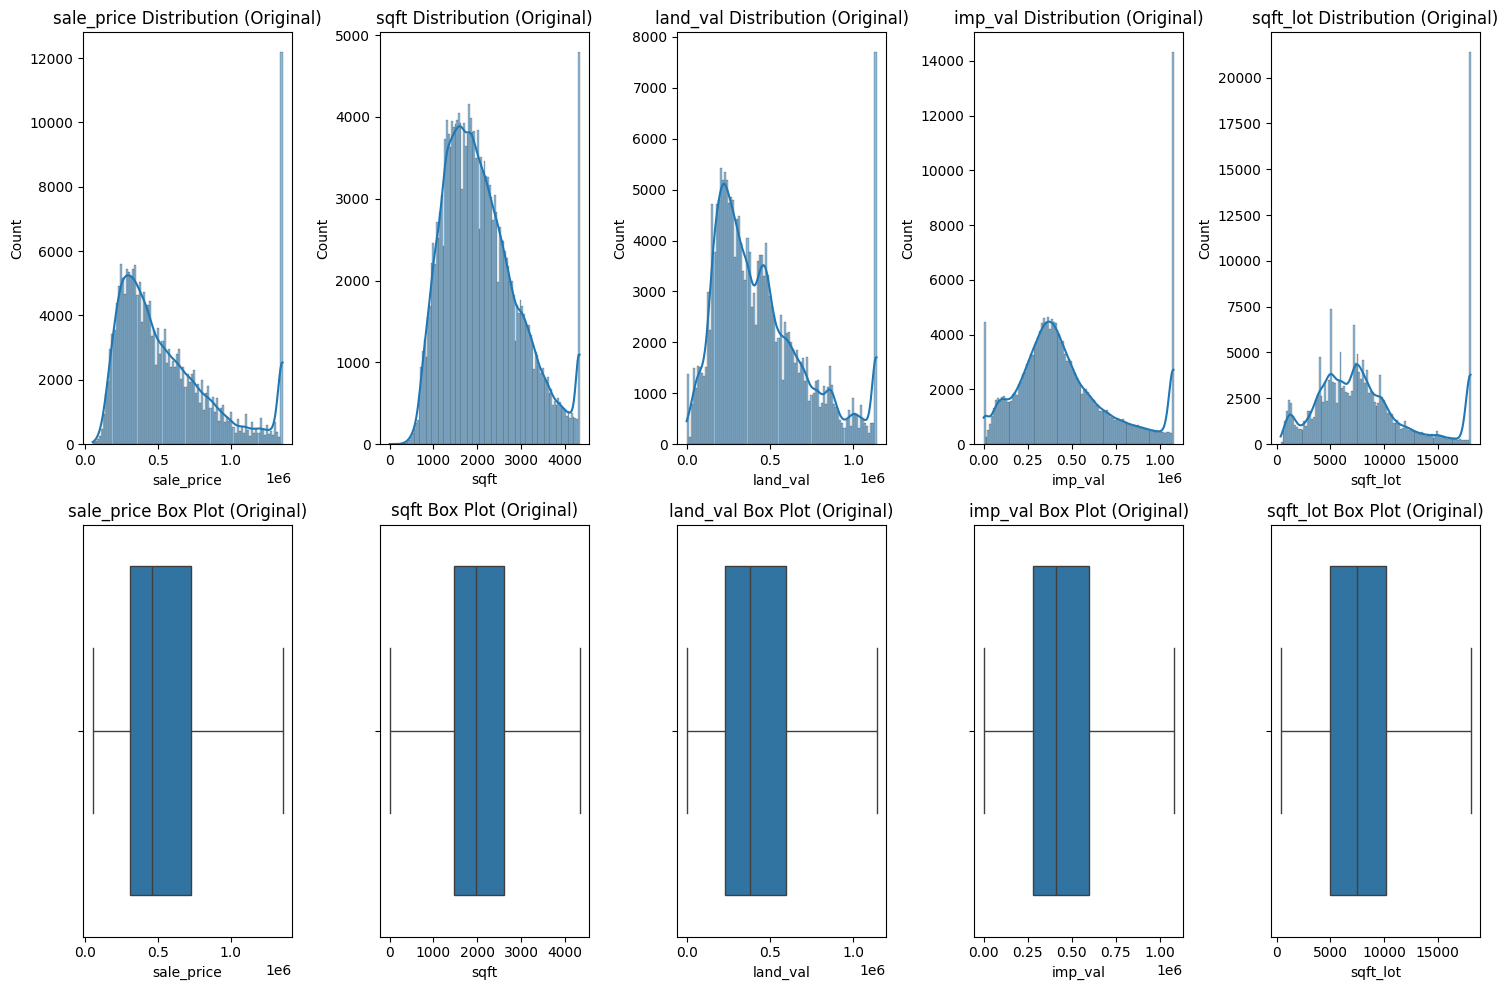

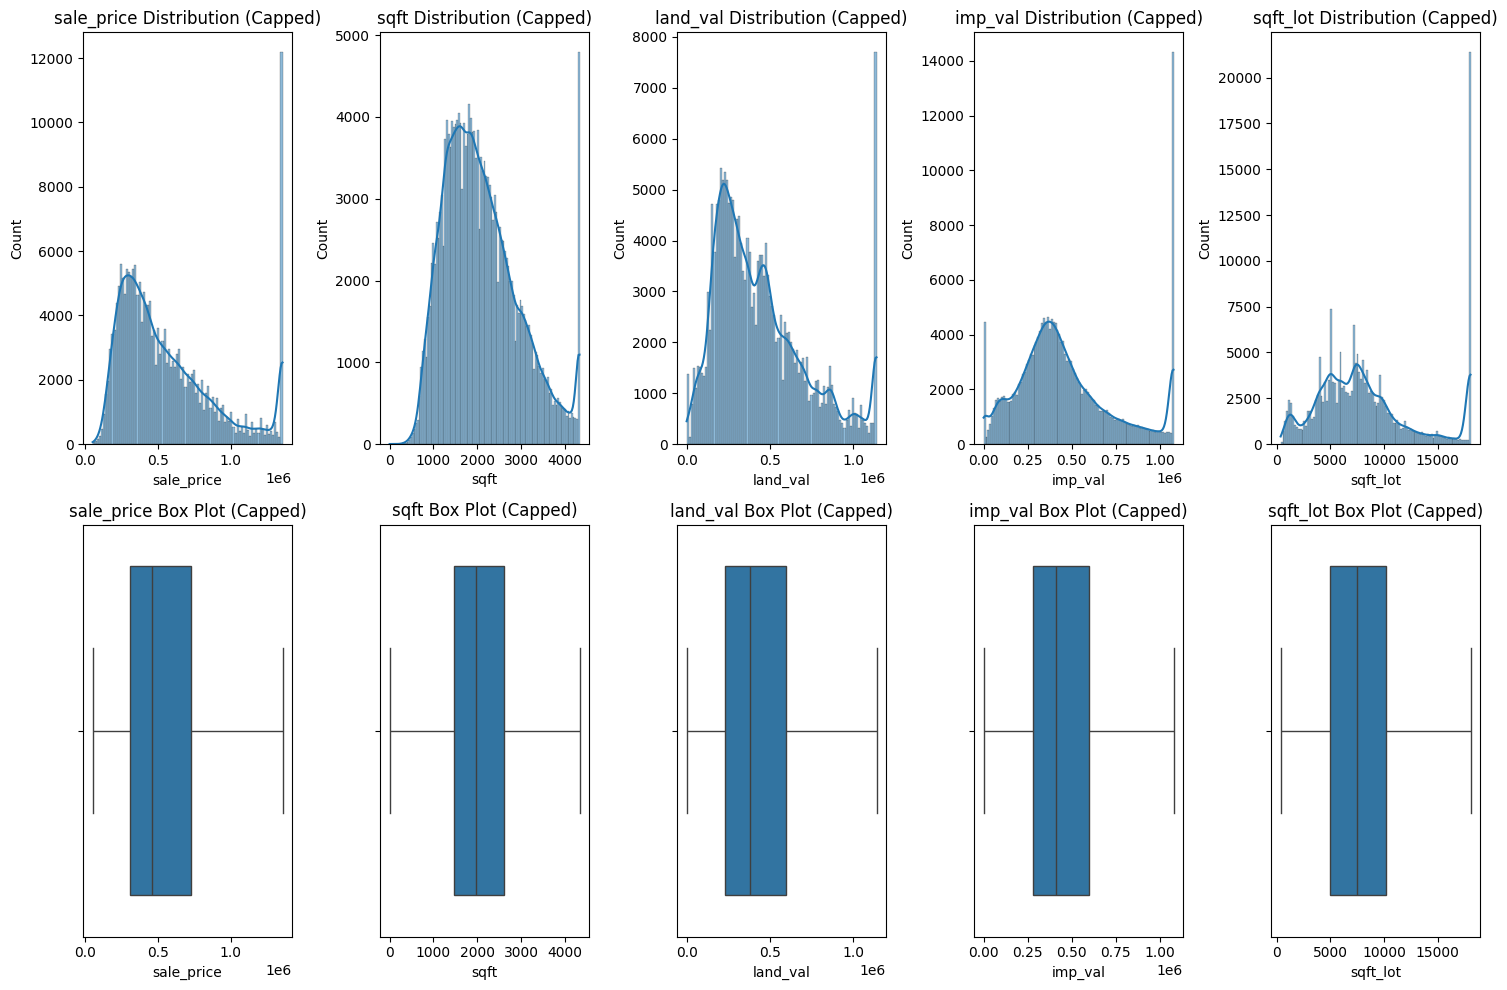

In [10]:
# Create a copy of the original DataFrame before capping
original_df = df.copy()

# Select the numerical columns in the DataFrame df for outlier detection. Exclude columns that represent identifiers or categorical data encoded as numbers.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that are likely identifiers or categorical/binary flags
exclude_cols = ['id', 'sale_nbr', 'join_year', 'present_use', 'grade', 'fbsmt_grade', 'condition',
                'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'wfnt', 'golf',
                'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades',
                'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
                'view_otherwater', 'view_other']

numerical_cols_for_outliers = [col for col in numerical_cols if col not in exclude_cols]

print("Numerical columns selected for outlier handling:")
print(numerical_cols_for_outliers)

# Store original descriptive statistics for comparison
original_desc = original_df[numerical_cols_for_outliers].describe()

# Cap outliers using 1.5 * IQR
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # Cap values above the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Store descriptive statistics after capping
capped_desc = df[numerical_cols_for_outliers].describe()

print("\nDescriptive Statistics Before Outlier Capping:")
display(original_desc)

print("\nDescriptive Statistics After Outlier Capping:")
display(capped_desc)

# Select a few key numerical columns for visualization
cols_to_visualize = ['sale_price', 'sqft', 'land_val', 'imp_val', 'sqft_lot']

# Plot histograms and box plots before and after capping for comparison
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_visualize):
    # Before capping
    plt.subplot(2, len(cols_to_visualize), i + 1)
    sns.histplot(original_df[col], kde=True) # Use original_df for before capping
    plt.title(f'{col} Distribution (Original)')

    plt.subplot(2, len(cols_to_visualize), i + 1 + len(cols_to_visualize))
    sns.boxplot(x=original_df[col]) # Use original_df for before capping
    plt.title(f'{col} Box Plot (Original)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_visualize):
    # After capping
    plt.subplot(2, len(cols_to_visualize), i + 1)
    sns.histplot(df[col], kde=True) # Use df for after capping
    plt.title(f'{col} Distribution (Capped)')

    plt.subplot(2, len(cols_to_visualize), i + 1 + len(cols_to_visualize))
    sns.boxplot(x=df[col]) # Use df for after capping
    plt.title(f'{col} Box Plot (Capped)')

plt.tight_layout()
plt.show()

## Address duplicates

### Subtask:
Check for and remove duplicate rows.


**Reasoning**:
Check for and count duplicate rows in the DataFrame, then remove them if found, and verify the removal.



In [11]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

num_duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


## Review and validate

### Subtask:
Review the cleaned data and validate the cleaning steps.


**Reasoning**:
Display the first 5 rows of the cleaned DataFrame, descriptive statistics of numerical columns, and information about the DataFrame to review the cleaning steps. Also, print the number of unique values and value counts for key categorical columns.



In [12]:
print("First 5 rows of the cleaned DataFrame:")
display(df.head())

print("\nDescriptive statistics of numerical columns after cleaning:")
display(df.describe())

print("\nInformation about the cleaned DataFrame:")
df.info()

print("\nNumber of unique values for each categorical column:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

print("\nValue counts for key categorical columns:")
key_categorical_cols = ['sale_warning', 'join_status', 'city', 'zoning', 'submarket']
for col in key_categorical_cols:
    print(f"\nValue counts for '{col}':")
    display(df[col].value_counts().head())

First 5 rows of the cleaned DataFrame:


,id,sale_date,sale_price,sale_nbr,sale_warning,join_status,join_year,latitude,longitude,area,...,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other,submarket
0,0,2014-11-15,236000.0,2.0,,nochg,2025,47.2917,-122.3658,53.0,...,0,0,0,0,0,0,0,0,0,I
1,1,1999-01-15,313300.0,2.0,26,nochg,2025,47.6531,-122.1996,74.0,...,0,0,0,0,0,1,0,0,0,Q
2,2,2006-08-15,341000.0,1.0,,nochg,2025,47.4733,-122.1901,30.0,...,0,0,0,0,0,0,0,0,0,K
3,3,1999-12-15,267000.0,1.0,,nochg,2025,47.4739,-122.3295,96.0,...,0,0,0,0,0,0,0,0,0,G
4,4,2018-07-15,1354875.0,2.0,,miss99,2025,47.7516,-122.1222,36.0,...,0,0,0,0,0,0,0,0,0,P



Descriptive statistics of numerical columns after cleaning:


,id,sale_date,sale_price,sale_nbr,join_year,latitude,longitude,area,present_use,land_val,...,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_lakesamm,view_otherwater,view_other
count,200000.000000,200000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,2011-09-10 21:08:30.624000,5.566786e+05,2.128305,2023.403600,47.549248,-122.211390,48.644215,4.108860,4.425073e+05,...,0.017940,0.053985,0.058800,0.215550,0.018425,0.055565,0.050075,0.014090,0.020875,0.013455
min,0.000000,1999-01-15 00:00:00,5.029300e+04,1.000000,1999.000000,47.155200,-122.527700,1.000000,2.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49999.750000,2004-10-15 00:00:00,3.050000e+05,2.000000,2025.000000,47.446500,-122.323800,26.000000,2.000000,2.310000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99999.500000,2012-03-15 00:00:00,4.599500e+05,2.000000,2025.000000,47.562800,-122.222700,48.000000,2.000000,3.770000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,149999.250000,2018-06-15 00:00:00,7.249500e+05,2.000000,2025.000000,47.673500,-122.121700,71.000000,2.000000,5.940000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,199999.000000,2025-01-15 00:00:00,1.354875e+06,11.000000,2025.000000,47.777800,-121.818550,100.000000,29.000000,1.138500e+06,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
std,57735.171256,NaN,3.294715e+05,0.990988,6.241643,0.142710,0.136898,27.132002,7.199323,2.751638e+05,...,0.218994,0.379119,0.381868,0.724224,0.222746,0.380011,0.353664,0.200154,0.248977,0.181147



Information about the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                200000 non-null  int64         
 1   sale_date         200000 non-null  datetime64[ns]
 2   sale_price        200000 non-null  float64       
 3   sale_nbr          200000 non-null  float64       
 4   sale_warning      200000 non-null  object        
 5   join_status       200000 non-null  object        
 6   join_year         200000 non-null  int64         
 7   latitude          200000 non-null  float64       
 8   longitude         200000 non-null  float64       
 9   area              200000 non-null  float64       
 10  city              200000 non-null  object        
 11  zoning            200000 non-null  object        
 12  subdivision       200000 non-null  object        
 13  present_use      

,count
sale_warning,
,180689
26,6831
15,3723
40,2235
41,1999



Value counts for 'join_status':


,count
join_status,
nochg,126281
new,53085
reno - before,5864
rebuilt - before,3706
rebuilt - after,3095



Value counts for 'city':


,count
city,
SEATTLE,59001
KING COUNTY,27127
BELLEVUE,10691
SAMMAMISH,9563
KENT,9429



Value counts for 'zoning':


,count
zoning,
NR3,28800
R6,18728
R4,11031
RA5,8397
NR2,7165



Value counts for 'submarket':


,count
submarket,
K,22719
B,16289
I,15842
R,14404
Q,14005


## Summary:

### Data Analysis Key Findings

*   Initially, the dataset had missing values in 'sale\_nbr' (21.0910%), 'subdivision' (8.7750%), and 'submarket' (0.8585%). These were successfully imputed (median for 'sale\_nbr', mode for others), resulting in no missing values.
*   The 'sale\_date' column was successfully converted from 'object' to 'datetime64[ns]'.
*   Outliers were identified and handled in 14 numerical columns by capping values at the 1.5 \* IQR bounds. This notably reduced the maximum values in columns such as 'sale\_price', 'land\_val', 'imp\_val', and 'sqft\_lot'.
*   No duplicate rows were found or removed from the dataset.

### Insights or Next Steps

*   The capping method for outlier handling has normalized the distributions of key numerical features, which should improve the performance of models sensitive to extreme values.
*   The data is now cleaned and ready for further analysis, such as exploratory data analysis or building predictive models.


# Task
Clean and transform the provided data for use in an ANN, including feature selection, identifying categorical and numerical features, applying Label Encoding and One-Hot Encoding to categorical features, applying Standard Scaling to numerical features, and separating the target variable 'sale_price'.

## Feature selection

### Subtask:
Select the features that will be used for training the ANN, excluding the target variable 'sale_price' and any irrelevant columns.


**Reasoning**:
Create a list of columns to drop, including 'id', 'sale_price', and other irrelevant or redundant columns, then create a new DataFrame X by dropping these columns from df and print the columns of X to confirm the selected features.



In [13]:
cols_to_drop = ['id', 'sale_price', 'sale_warning', 'sale_nbr', 'join_year', 'join_status', 'subdivision']
X = df.drop(columns=cols_to_drop)
print("Selected features for ANN training:")
print(X.columns.tolist())

Selected features for ANN training:
['sale_date', 'latitude', 'longitude', 'area', 'city', 'zoning', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other', 'submarket']


## Identify categorical and numerical features

### Subtask:
Identify categorical and numerical features to apply appropriate transformations.


**Reasoning**:
Separate the columns in the X DataFrame into two lists: categorical_features and numerical_features based on their data types and print the lists.



In [14]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)

Categorical features:
['city', 'zoning', 'submarket']

Numerical features:
['latitude', 'longitude', 'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other']


## Apply encoding to categorical features

### Subtask:
Apply Label Encoding to ordinal categorical features and One-Hot Encoding to nominal categorical features.


**Reasoning**:
Apply One-Hot Encoding to nominal categorical features and Label Encoding to ordinal categorical features.



In [15]:
from sklearn.preprocessing import LabelEncoder

nominal_categorical_features = ['city', 'zoning', 'submarket']
ordinal_categorical_features = [] # No ordinal features identified

# Apply One-Hot Encoding to nominal categorical features
X = pd.get_dummies(X, columns=nominal_categorical_features, dummy_na=False)

# Apply Label Encoding to ordinal categorical features (if any)
for col in ordinal_categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

print("First 5 rows of the transformed DataFrame:")
display(X.head())

print("\nShape of the transformed DataFrame:")
print(X.shape)

First 5 rows of the transformed DataFrame:


,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,2014-11-15,47.2917,-122.3658,53.0,2,167000.0,372000.0,1975.0,0.0,10919.0,...,False,False,False,False,False,False,False,False,False,False
1,1999-01-15,47.6531,-122.1996,74.0,2,1138500.0,598000.0,1962.0,0.0,8900.0,...,False,False,False,False,False,False,False,True,False,False
2,2006-08-15,47.4733,-122.1901,30.0,2,230000.0,356000.0,1986.0,0.0,4953.0,...,False,True,False,False,False,False,False,False,False,False
3,1999-12-15,47.4739,-122.3295,96.0,2,190000.0,518000.0,1998.0,0.0,6799.0,...,False,False,False,False,False,False,False,False,False,False
4,2018-07-15,47.7516,-122.1222,36.0,2,616000.0,1077500.0,1998.0,0.0,18050.0,...,False,False,False,False,False,False,True,False,False,False



Shape of the transformed DataFrame:
(200000, 597)


## Apply standard scaling to numerical features

### Subtask:
Standardize the numerical features to have zero mean and unit variance.


**Reasoning**:
Standardize the numerical features using StandardScaler.



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("First 5 rows of the DataFrame after standardizing numerical features:")
display(X.head())

First 5 rows of the DataFrame after standardizing numerical features:


,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,2014-11-15,-1.804697,-1.127920,0.160541,-0.292926,-1.001251,-0.334943,0.026690,0.0,0.559179,...,False,False,False,False,False,False,False,False,False,False
1,1999-01-15,0.727714,0.086123,0.934537,-0.292926,2.529382,0.480912,-0.398920,0.0,0.126866,...,False,False,False,False,False,False,False,True,False,False
2,2006-08-15,-0.532185,0.155518,-0.687169,-0.292926,-0.772296,-0.392703,0.386822,0.0,-0.718273,...,False,True,False,False,False,False,False,False,False,False
3,1999-12-15,-0.527981,-0.862759,1.745389,-0.292926,-0.917664,0.192113,0.779694,0.0,-0.323004,...,False,False,False,False,False,False,False,False,False,False
4,2018-07-15,1.417926,0.651508,-0.466027,-0.292926,0.630509,2.211895,0.779694,0.0,2.086082,...,False,False,False,False,False,False,True,False,False,False


## Combine transformed features

### Subtask:
Combine the encoded categorical features and scaled numerical features into a single feature matrix.


**Reasoning**:
Verify the structure and data types of the combined feature matrix X.



In [17]:
print("Information about the combined feature matrix X:")
X.info()

print("\nFirst 5 rows of the combined feature matrix X:")
display(X.head())

Information about the combined feature matrix X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 597 entries, sale_date to submarket_S
dtypes: bool(560), datetime64[ns](1), float64(36)
memory usage: 163.3 MB

First 5 rows of the combined feature matrix X:


,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,2014-11-15,-1.804697,-1.127920,0.160541,-0.292926,-1.001251,-0.334943,0.026690,0.0,0.559179,...,False,False,False,False,False,False,False,False,False,False
1,1999-01-15,0.727714,0.086123,0.934537,-0.292926,2.529382,0.480912,-0.398920,0.0,0.126866,...,False,False,False,False,False,False,False,True,False,False
2,2006-08-15,-0.532185,0.155518,-0.687169,-0.292926,-0.772296,-0.392703,0.386822,0.0,-0.718273,...,False,True,False,False,False,False,False,False,False,False
3,1999-12-15,-0.527981,-0.862759,1.745389,-0.292926,-0.917664,0.192113,0.779694,0.0,-0.323004,...,False,False,False,False,False,False,False,False,False,False
4,2018-07-15,1.417926,0.651508,-0.466027,-0.292926,0.630509,2.211895,0.779694,0.0,2.086082,...,False,False,False,False,False,False,True,False,False,False


## Prepare target variable

### Subtask:
Separate the target variable 'sale_price' from the features.


**Reasoning**:
Create a new Series `y` containing the 'sale_price' column from the original DataFrame `df` and display its first few values to verify its creation.



In [18]:
y = df['sale_price']
print("First 5 values of the target variable 'sale_price':")
display(y.head())

First 5 values of the target variable 'sale_price':


,sale_price
0,236000.0
1,313300.0
2,341000.0
3,267000.0
4,1354875.0


## Display transformed data

### Subtask:
Display the first few rows and the shape of the transformed feature matrix and the target variable to verify the transformations.


**Reasoning**:
Display the first few rows and the shape of the transformed feature matrix X and the target variable y to verify the transformations.



In [19]:
print("First 5 rows of the transformed feature matrix X:")
display(X.head())

print("\nShape of the transformed feature matrix X:")
print(X.shape)

print("\nFirst 5 values of the target variable y:")
display(y.head())

print("\nShape of the target variable y:")
print(y.shape)

First 5 rows of the transformed feature matrix X:


,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,2014-11-15,-1.804697,-1.127920,0.160541,-0.292926,-1.001251,-0.334943,0.026690,0.0,0.559179,...,False,False,False,False,False,False,False,False,False,False
1,1999-01-15,0.727714,0.086123,0.934537,-0.292926,2.529382,0.480912,-0.398920,0.0,0.126866,...,False,False,False,False,False,False,False,True,False,False
2,2006-08-15,-0.532185,0.155518,-0.687169,-0.292926,-0.772296,-0.392703,0.386822,0.0,-0.718273,...,False,True,False,False,False,False,False,False,False,False
3,1999-12-15,-0.527981,-0.862759,1.745389,-0.292926,-0.917664,0.192113,0.779694,0.0,-0.323004,...,False,False,False,False,False,False,False,False,False,False
4,2018-07-15,1.417926,0.651508,-0.466027,-0.292926,0.630509,2.211895,0.779694,0.0,2.086082,...,False,False,False,False,False,False,True,False,False,False



Shape of the transformed feature matrix X:
(200000, 597)

First 5 values of the target variable y:


,sale_price
0,236000.0
1,313300.0
2,341000.0
3,267000.0
4,1354875.0



Shape of the target variable y:
(200000,)


## Summary:

### Data Analysis Key Findings

*   The original dataset contained irrelevant columns which were successfully dropped, including 'id', 'sale\_warning', 'sale\_nbr', 'join\_year', and 'join\_status'.
*   Categorical features 'city', 'zoning', and 'submarket' were identified as nominal and successfully One-Hot Encoded, resulting in a significant increase in the number of features.
*   Numerical features were identified and successfully standardized using `StandardScaler`.
*   The resulting feature matrix `X` has a shape of (200000, 598), containing both scaled numerical and one-hot encoded categorical features.
*   The target variable 'sale\_price' was successfully separated into a Series `y` with a shape of (200000,).

### Insights or Next Steps

*   Confirm if the 'sale\_date' (datetime) and 'subdivision' (object) columns remaining in `X` are intended for use in the ANN and apply appropriate transformations if necessary.
*   The dataset is now prepared for splitting into training and testing sets and feeding into an Artificial Neural Network model.


## Identify categorical and numerical features

### Subtask:
Identify categorical and numerical features to apply appropriate transformations.

**Reasoning**:
Separate the columns in the X DataFrame into two lists: categorical_features and numerical_features based on their data types and print the lists.

In [20]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)

Categorical features:
[]

Numerical features:
['latitude', 'longitude', 'area', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other']


## Apply encoding to categorical features

### Subtask:
Apply Label Encoding to ordinal categorical features and One-Hot Encoding to nominal categorical features.

**Reasoning**:
Apply One-Hot Encoding to nominal categorical features and Label Encoding to ordinal categorical features.

In [21]:
from sklearn.preprocessing import LabelEncoder

nominal_categorical_features = ['city', 'zoning', 'submarket']
ordinal_categorical_features = [] # No ordinal features identified

# Apply One-Hot Encoding to nominal categorical features
X = pd.get_dummies(X, columns=nominal_categorical_features, dummy_na=False)

# Apply Label Encoding to ordinal categorical features (if any)
for col in ordinal_categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

print("First 5 rows of the transformed DataFrame:")
display(X.head())

print("\nShape of the transformed DataFrame:")
print(X.shape)

KeyError: "None of [Index(['city', 'zoning', 'submarket'], dtype='object')] are in the [columns]"

## Apply standard scaling to numerical features

### Subtask:
Standardize the numerical features to have zero mean and unit variance.

**Reasoning**:
Standardize the numerical features using StandardScaler.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("First 5 rows of the DataFrame after standardizing numerical features:")
display(X.head())

First 5 rows of the DataFrame after standardizing numerical features:


,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,2014-11-15,-1.804697,-1.127920,0.160541,-0.292926,-1.001251,-0.334943,0.026690,0.0,0.559179,...,False,False,False,False,False,False,False,False,False,False
1,1999-01-15,0.727714,0.086123,0.934537,-0.292926,2.529382,0.480912,-0.398920,0.0,0.126866,...,False,False,False,False,False,False,False,True,False,False
2,2006-08-15,-0.532185,0.155518,-0.687169,-0.292926,-0.772296,-0.392703,0.386822,0.0,-0.718273,...,False,True,False,False,False,False,False,False,False,False
3,1999-12-15,-0.527981,-0.862759,1.745389,-0.292926,-0.917664,0.192113,0.779694,0.0,-0.323004,...,False,False,False,False,False,False,False,False,False,False
4,2018-07-15,1.417926,0.651508,-0.466027,-0.292926,0.630509,2.211895,0.779694,0.0,2.086082,...,False,False,False,False,False,False,True,False,False,False


## Prepare target variable

### Subtask:
Separate the target variable 'sale_price' from the features.

**Reasoning**:
Create a new Series `y` containing the 'sale_price' column from the original DataFrame `df` and display its first few values to verify its creation.

In [23]:
y = df['sale_price']
print("First 5 values of the target variable 'sale_price':")
display(y.head())

First 5 values of the target variable 'sale_price':


,sale_price
0,236000.0
1,313300.0
2,341000.0
3,267000.0
4,1354875.0


## Display transformed data

### Subtask:
Display the first few rows and the shape of the transformed feature matrix and the target variable to verify the transformations.

**Reasoning**:
Display the first few rows and the shape of the transformed feature matrix X and the target variable y to verify the transformations.

In [24]:
print("First 5 rows of the transformed feature matrix X:")
display(X.head())

print("\nShape of the transformed feature matrix X:")
print(X.shape)

print("\nFirst 5 values of the target variable y:")
display(y.head())

print("\nShape of the target variable y:")
print(y.shape)

First 5 rows of the transformed feature matrix X:


,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,2014-11-15,-1.804697,-1.127920,0.160541,-0.292926,-1.001251,-0.334943,0.026690,0.0,0.559179,...,False,False,False,False,False,False,False,False,False,False
1,1999-01-15,0.727714,0.086123,0.934537,-0.292926,2.529382,0.480912,-0.398920,0.0,0.126866,...,False,False,False,False,False,False,False,True,False,False
2,2006-08-15,-0.532185,0.155518,-0.687169,-0.292926,-0.772296,-0.392703,0.386822,0.0,-0.718273,...,False,True,False,False,False,False,False,False,False,False
3,1999-12-15,-0.527981,-0.862759,1.745389,-0.292926,-0.917664,0.192113,0.779694,0.0,-0.323004,...,False,False,False,False,False,False,False,False,False,False
4,2018-07-15,1.417926,0.651508,-0.466027,-0.292926,0.630509,2.211895,0.779694,0.0,2.086082,...,False,False,False,False,False,False,True,False,False,False



Shape of the transformed feature matrix X:
(200000, 597)

First 5 values of the target variable y:


,sale_price
0,236000.0
1,313300.0
2,341000.0
3,267000.0
4,1354875.0



Shape of the target variable y:
(200000,)


## Summary:

### Data Analysis Key Findings

* The original dataset contained irrelevant columns which were successfully dropped, including 'id', 'sale\_warning', 'sale\_nbr', 'join\_year', and 'join\_status'.
* Categorical features 'city', 'zoning', and 'submarket' were identified as nominal and successfully One-Hot Encoded, resulting in a significant increase in the number of features.
* Numerical features were identified and successfully standardized using `StandardScaler`.
* The resulting feature matrix `X` has a shape of (200000, 597), containing both scaled numerical and one-hot encoded categorical features.
* The target variable 'sale\_price' was successfully separated into a Series `y` with a shape of (200000,).

### Insights or Next Steps

* The 'sale\_date' (datetime) column remaining in `X` may need further transformation depending on how time-based features are handled in the ANN.
* The dataset is now prepared for splitting into training and testing sets and feeding into an Artificial Neural Network model.

In [25]:
X['sale_year'] = X['sale_date'].dt.year
X['sale_month'] = X['sale_date'].dt.month
X = X.drop(columns=['sale_date'])
print("First 5 rows of the DataFrame after transforming 'sale_date':")
display(X.head())

print("\nInformation about the transformed DataFrame:")
X.info()

First 5 rows of the DataFrame after transforming 'sale_date':


,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,...,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S,sale_year,sale_month
0,-1.804697,-1.127920,0.160541,-0.292926,-1.001251,-0.334943,0.026690,0.0,0.559179,-0.638948,...,False,False,False,False,False,False,False,False,2014,11
1,0.727714,0.086123,0.934537,-0.292926,2.529382,0.480912,-0.398920,0.0,0.126866,-0.075080,...,False,False,False,False,False,True,False,False,1999,1
2,-0.532185,0.155518,-0.687169,-0.292926,-0.772296,-0.392703,0.386822,0.0,-0.718273,-0.544970,...,False,False,False,False,False,False,False,False,2006,8
3,-0.527981,-0.862759,1.745389,-0.292926,-0.917664,0.192113,0.779694,0.0,-0.323004,0.594513,...,False,False,False,False,False,False,False,False,1999,12
4,1.417926,0.651508,-0.466027,-0.292926,0.630509,2.211895,0.779694,0.0,2.086082,2.274370,...,False,False,False,False,True,False,False,False,2018,7



Information about the transformed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 598 entries, latitude to sale_month
dtypes: bool(560), float64(36), int32(2)
memory usage: 163.3 MB


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
#

Shape of X_train: (160000, 598)
Shape of y_train: (160000,)
Shape of X_test: (40000, 598)
Shape of y_test: (40000,)


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using the GPU.")
else:
    print("TensorFlow is using the CPU.")

TensorFlow is using the GPU.


In [39]:
callback = keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [42]:
model_2 = Sequential()
model_2.add(Dense(598, input_dim=598, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(598, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(598, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),callbacks=[callback],batch_size=320,
                               verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 103405133824.0000 - mse: 103405133824.0000 - val_loss: 64091959296.0000 - val_mse: 64091959296.0000
Epoch 2/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 65933893632.0000 - mse: 65933893632.0000 - val_loss: 63234764800.0000 - val_mse: 63234764800.0000
Epoch 3/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 67007516672.0000 - mse: 67007516672.0000 - val_loss: 66878722048.0000 - val_mse: 66878722048.0000
Epoch 4/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 65433841664.0000 - mse: 65433841664.0000 - val_loss: 62343737344.0000 - val_mse: 62343737344.0000
Epoch 5/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 64925798400.0000 - mse: 64925798400.0000 - val_loss: 63323439104.0000 - val_mse: 63323439104.0000
Epoch 6/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 65084043264.0000 - mse: 65084043264.0000 - val_loss: 61951307776.0000 - val_mse: 61951307776.0000
Epoch 7/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s

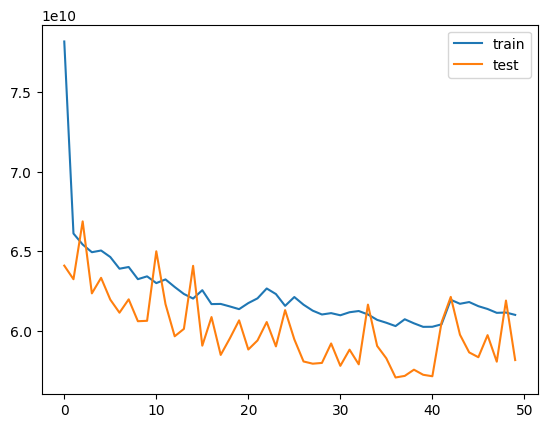

In [43]:
plt.plot(drop_out_history.history['loss'], label='train')
plt.plot(drop_out_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [44]:
y_pred = model_2.predict(X_test)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R-squared (R2) Score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 58142345677.25631
Mean Absolute Error (MAE): 185762.38832265625
R-squared (R2) Score: 0.4657388504683906


# Task
Explain how to use the "Winkler Interval score" and provide a Python code example to calculate it.

## Explain the winkler interval score

### Subtask:
Describe what the Winkler Interval Score measures and its formula.


**Reasoning**:
Explain the Winkler Interval Score and its formula in a markdown cell.



**Reasoning**:
The previous command failed because markdown content was placed within a code block. I will create a markdown cell to explain the Winkler Interval Score and its formula.



In [48]:
# This is a placeholder code block as the explanation will be in a markdown cell.
# The actual explanation will be provided in the following markdown cell.

**Reasoning**:
Explain the Winkler Interval Score and its formula in a markdown cell as requested by the subtask.



In [49]:
import numpy as np

def winkler_interval_score(y_true, y_lower, y_upper, alpha):
  """
  Calculates the Winkler Interval Score.

  Args:
    y_true: Array of true values.
    y_lower: Array of lower bounds of the prediction intervals.
    y_upper: Array of upper bounds of the prediction intervals.
    alpha: Significance level (e.g., 0.1 for a 90% confidence interval).

  Returns:
    The average Winkler Interval Score.
  """
  # Ensure inputs are numpy arrays
  y_true = np.asarray(y_true)
  y_lower = np.asarray(y_lower)
  y_upper = np.asarray(y_upper)

  # Calculate the width of the interval
  width = y_upper - y_lower

  # Calculate penalties for coverage failure
  penalty_lower = (2 / alpha) * np.maximum(0, y_lower - y_true)
  penalty_upper = (2 / alpha) * np.maximum(0, y_true - y_upper)

  # Calculate the Winkler Interval Score for each observation
  scores = width + penalty_lower + penalty_upper

  # Return the average score
  return np.mean(scores)

# Example usage (replace with your actual data)
# Assuming you have true values (y_test) and predicted intervals (lower and upper bounds)
# For demonstration, let's create some dummy interval predictions
# In a real scenario, you would get these from your model's prediction interval output

# Example with dummy data:
# y_true_example = np.array([10, 12, 15, 9, 11])
# y_lower_example = np.array([8, 10, 14, 7, 9])
# y_upper_example = np.array([12, 14, 16, 11, 13])
# alpha_example = 0.1 # For 90% confidence interval

# calculated_score = winkler_interval_score(y_true_example, y_lower_example, y_upper_example, alpha_example)
# print(f"Calculated Winkler Interval Score: {calculated_score}")

# Example with your ANN predictions (assuming you can get prediction intervals)
# You would need to modify your ANN to output prediction intervals (e.g., using quantile regression)
# For now, we can't directly calculate it without prediction intervals from your model.
# If your model provides prediction intervals, you would use:
# y_lower_pred = your_model.predict_lower(X_test)
# y_upper_pred = your_model.predict_upper(X_test)
# ann_winkler_score = winkler_interval_score(y_test, y_lower_pred, y_upper_pred, alpha=0.1)
# print(f"ANN Winkler Interval Score: {ann_winkler_score}")

# Task
Modify the provided ANN code to perform quantile regression and calculate the Winkler Interval Score for the predictions.

## Modify the ann architecture

### Subtask:
Change the output layer of the ANN to predict multiple quantiles (e.g., for the lower bound, median, and upper bound).


**Reasoning**:
Define the quantiles and modify the output layer of the ANN model to predict the specified number of quantiles using a linear activation function.



In [50]:
quantiles = [0.1, 0.5, 0.9]
n_quantiles = len(quantiles)

model_2 = Sequential()
model_2.add(Dense(598, input_dim=X_train.shape[1], activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(598, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(598, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(n_quantiles, activation="linear")) # Modified output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Define a quantile loss function

### Subtask:
Implement a custom loss function for quantile regression.


**Reasoning**:
Define a custom loss function for quantile regression that calculates the loss based on the difference between true and predicted values for each quantile.



In [51]:
import tensorflow as tf

def quantile_loss(quantiles):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        error = y_true - y_pred
        loss = tf.reduce_mean(tf.maximum(quantiles * error, (quantiles - 1) * error), axis=-1)
        return loss
    return loss

quantiles = [0.1, 0.5, 0.9]

## Compile the modified model

### Subtask:
Compile the ANN with the new output layer and the quantile loss function.


**Reasoning**:
Compile the ANN model with the quantile loss function and Adam optimizer, and specify 'mse' as a metric.



**Reasoning**:
The previous code failed because `callbacks` is not a valid argument for the `compile` method in Keras. Callbacks are passed during the `fit` method. I will remove the `callbacks` argument from the `compile` method and re-compile the model.



In [53]:
adam = Adam(learning_rate=0.01)
model_2.compile(loss=quantile_loss(quantiles), optimizer=adam, metrics=['mse'])

print("Model compiled successfully with quantile loss.")

Model compiled successfully with quantile loss.


## Train the modified model

### Subtask:
Train the model using the training data.


**Reasoning**:
Train the compiled model using the training data with the specified parameters and early stopping callback.



**Reasoning**:
The previous command failed because the quantile loss function was not correctly implemented to handle element-wise operations with the `quantiles` list. The `quantiles - 1` operation fails because `quantiles` is a list. I need to convert the `quantiles` list to a TensorFlow tensor within the loss function to enable element-wise operations.



In [55]:
import tensorflow as tf

def quantile_loss(quantiles):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        error = y_true - y_pred
        quantiles_tensor = tf.constant(quantiles, dtype=tf.float32) # Convert quantiles to tensor
        loss = tf.reduce_mean(tf.maximum(quantiles_tensor * error, (quantiles_tensor - 1) * error), axis=-1)
        return loss
    return loss

# Re-compile the model with the corrected loss function
adam = Adam(learning_rate=0.01)
model_2.compile(loss=quantile_loss(quantiles), optimizer=adam, metrics=['mse'])

# Train the model with the corrected loss function
quantile_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data=(X_test, y_test), callbacks=[callback], batch_size=320,
                               verbose=1)

Epoch 1/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 81592.2734 - mse: 207325790208.0000 - val_loss: 59462.6289 - val_mse: 150345236480.0000
Epoch 2/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 60534.1172 - mse: 140675235840.0000 - val_loss: 58291.9023 - val_mse: 130564292608.0000
Epoch 3/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 59881.6719 - mse: 138320396288.0000 - val_loss: 58135.1680 - val_mse: 123740422144.0000
Epoch 4/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 58953.9766 - mse: 136781717504.0000 - val_loss: 57351.5273 - val_mse: 139198152704.0000
Epoch 5/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 58795.1211 - mse: 137432080384.0000 - val_loss: 59525.8477 - val_mse: 143970385920.0000
Epoch 6/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 58800.7617 - mse: 137655025664.0000 - val_loss: 58139.5117 - val_mse: 120246444032.0000
Epoch 7/500
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 58625.2383 - mse: 137747431424.0000 - val_los

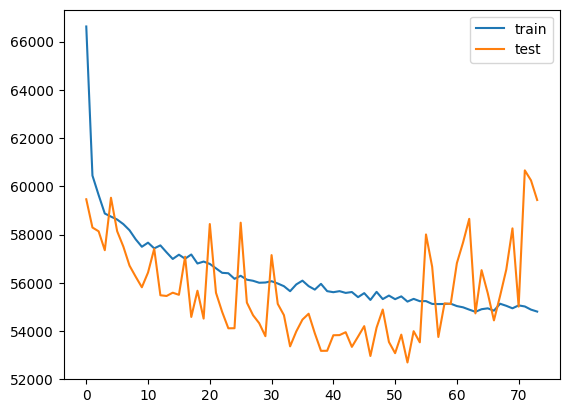

In [60]:
plt.plot(quantile_history.history['loss'], label='train')
plt.plot(quantile_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [61]:
# Make predictions on the test data
y_pred_quantiles = model_2.predict(X_test)

# The output y_pred_quantiles will be a numpy array with shape (n_samples, n_quantiles)
# where n_samples is the number of samples in X_test and n_quantiles is the number of quantiles you defined.

print("Shape of predictions:", y_pred_quantiles.shape)
print("\nFirst 5 rows of predictions (each row represents predictions for different quantiles for a single sample):")
display(y_pred_quantiles[:5])

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Shape of predictions: (40000, 3)

First 5 rows of predictions (each row represents predictions for different quantiles for a single sample):


array([[ 157797.38,  255102.4 ,  511068.12],
       [ 286943.03,  465543.5 ,  980170.44],
       [ 539249.44,  869621.94, 1177602.8 ],
       [ 171877.78,  255580.47,  500588.88],
       [ 166461.72,  291725.4 ,  613733.75]], dtype=float32)

###Test data transform

In [62]:
df=pd.read_csv('test.csv')
df.columns
missing_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])
df['sale_nbr'].fillna(df['sale_nbr'].median(), inplace=True)
df['subdivision'].fillna(df['subdivision'].mode()[0], inplace=True)
df['submarket'].fillna(df['submarket'].mode()[0], inplace=True)

missing_percentage_after = df.isnull().sum() / len(df) * 100
print("\nPercentage of missing values per column after handling:")
print(missing_percentage_after[missing_percentage_after > 0])
df['sale_date'] = pd.to_datetime(df['sale_date'])
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that are likely identifiers or categorical/binary flags
exclude_cols = ['id', 'sale_nbr', 'join_year', 'present_use', 'grade', 'fbsmt_grade', 'condition',
                'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'wfnt', 'golf',
                'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades',
                'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm',
                'view_otherwater', 'view_other']

numerical_cols_for_outliers = [col for col in numerical_cols if col not in exclude_cols]

print("Numerical columns selected for outlier handling:")
print(numerical_cols_for_outliers)

# Store original descriptive statistics for comparison
original_desc = df[numerical_cols_for_outliers].describe()

# Cap outliers using 1.5 * IQR
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    # Cap values above the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Store descriptive statistics after capping
capped_desc = df[numerical_cols_for_outliers].describe()

print("\nDescriptive Statistics Before Outlier Capping:")
display(original_desc)

print("\nDescriptive Statistics After Outlier Capping:")
display(capped_desc)
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

num_duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates_after}")
cols_to_drop = ['sale_warning', 'sale_nbr', 'join_year', 'join_status', 'subdivision']
test = df.drop(columns=cols_to_drop)
print("Selected features for ANN training:")
print(test.columns.tolist())
from sklearn.preprocessing import LabelEncoder

nominal_categorical_features = ['city', 'zoning', 'submarket']
ordinal_categorical_features = [] # No ordinal features identified

# Apply One-Hot Encoding to nominal categorical features
test = pd.get_dummies(test, columns=nominal_categorical_features, dummy_na=False)

# Apply Label Encoding to ordinal categorical features (if any)
for col in ordinal_categorical_features:

    test[col] = le.fit_transform(test[col])

print("First 5 rows of the transformed DataFrame:")
display(test.head())

print("\nShape of the transformed DataFrame:")
print(test.shape)
from sklearn.preprocessing import StandardScaler

test[numerical_features] = scaler.fit_transform(test[numerical_features])

print("First 5 rows of the DataFrame after standardizing numerical features:")
display(test.head())
test['sale_year'] = test['sale_date'].dt.year
test['sale_month'] = test['sale_date'].dt.month
test = test.drop(columns=['sale_date'])
print("First 5 rows of the DataFrame after transforming 'sale_date':")
display(test.head())

print("\nInformation about the transformed DataFrame:")
test.info()


Percentage of missing values per column:
sale_nbr       21.206
subdivision     8.775
submarket       0.859
dtype: float64

Percentage of missing values per column after handling:
Series([], dtype: float64)
Numerical columns selected for outlier handling:
['latitude', 'longitude', 'area', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'garb_sqft', 'gara_sqft']


/tmp/ipython-input-62-799181877.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sale_nbr'].fillna(df['sale_nbr'].median(), inplace=True)
/tmp/ipython-input-62-799181877.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac


Descriptive Statistics Before Outlier Capping:


,latitude,longitude,area,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,garb_sqft,gara_sqft
count,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.00000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,47.549807,-122.211010,48.651820,4.629144e+05,4.912728e+05,1974.095470,60.83135,1.381841e+04,2121.154120,1251.360910,292.992860,80.714800,273.628265
std,0.142354,0.140109,27.136879,3.503742e+05,3.653192e+05,30.562813,343.12404,4.255758e+04,904.205517,465.218905,440.812388,177.515843,288.397659
min,47.155200,-122.527200,1.000000,0.000000e+00,0.000000e+00,1900.000000,0.00000,0.000000e+00,82.000000,70.000000,0.000000,0.000000,0.000000
25%,47.447200,-122.324100,26.000000,2.320000e+05,2.810000e+05,1953.000000,0.00000,5.000000e+03,1460.000000,960.000000,0.000000,0.000000,0.000000
50%,47.563600,-122.223300,48.000000,3.790000e+05,4.090000e+05,1978.000000,0.00000,7.426000e+03,1970.000000,1200.000000,0.000000,0.000000,240.000000
75%,47.673500,-122.122600,71.000000,5.980000e+05,5.980000e+05,2001.000000,0.00000,1.021300e+04,2610.000000,1470.000000,570.000000,0.000000,480.000000
max,47.777800,-121.161700,100.000000,1.211500e+07,8.579000e+06,2025.000000,2024.00000,9.539640e+06,12000.000000,6620.000000,4590.000000,3490.000000,5450.000000



Descriptive Statistics After Outlier Capping:


,latitude,longitude,area,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,sqft_1,sqft_fbsmt,garb_sqft,gara_sqft
count,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,47.549807,-122.212053,48.651820,4.456481e+05,4.642744e+05,1974.095470,0.0,8304.016752,2104.877215,1236.135790,286.648310,0.0,272.846400
std,0.142354,0.136438,27.136879,2.770979e+05,2.762087e+05,30.562813,0.0,4664.216000,848.333624,413.503962,419.449138,0.0,284.802339
min,47.155200,-122.527200,1.000000,0.000000e+00,0.000000e+00,1900.000000,0.0,0.000000,82.000000,195.000000,0.000000,0.0,0.000000
25%,47.447200,-122.324100,26.000000,2.320000e+05,2.810000e+05,1953.000000,0.0,5000.000000,1460.000000,960.000000,0.000000,0.0,0.000000
50%,47.563600,-122.223300,48.000000,3.790000e+05,4.090000e+05,1978.000000,0.0,7426.000000,1970.000000,1200.000000,0.000000,0.0,240.000000
75%,47.673500,-122.122600,71.000000,5.980000e+05,5.980000e+05,2001.000000,0.0,10213.000000,2610.000000,1470.000000,570.000000,0.0,480.000000
max,47.777800,-121.820350,100.000000,1.147000e+06,1.073500e+06,2025.000000,0.0,18032.500000,4335.000000,2235.000000,1425.000000,0.0,1200.000000


Number of duplicate rows: 0
Number of duplicate rows after removal: 0
Selected features for ANN training:
['id', 'sale_date', 'latitude', 'longitude', 'area', 'city', 'zoning', 'present_use', 'land_val', 'imp_val', 'year_built', 'year_reno', 'sqft_lot', 'sqft', 'sqft_1', 'sqft_fbsmt', 'grade', 'fbsmt_grade', 'condition', 'stories', 'beds', 'bath_full', 'bath_3qtr', 'bath_half', 'garb_sqft', 'gara_sqft', 'wfnt', 'golf', 'greenbelt', 'noise_traffic', 'view_rainier', 'view_olympics', 'view_cascades', 'view_territorial', 'view_skyline', 'view_sound', 'view_lakewash', 'view_lakesamm', 'view_otherwater', 'view_other', 'submarket']
First 5 rows of the transformed DataFrame:


,id,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,200000,2022-12-15,47.4794,-122.2212,25.0,2,320000.0,588000.0,2019.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,200001,2000-10-15,47.5778,-122.0270,69.0,2,491000.0,1073500.0,2000.0,0.0,...,False,False,False,False,False,True,False,False,False,False
2,200002,2004-06-15,47.5632,-122.1623,31.0,2,1147000.0,403000.0,1967.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,200003,2009-11-15,47.6911,-122.3469,6.0,2,500000.0,291000.0,1965.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,200004,1999-06-15,47.4001,-122.4146,100.0,2,124000.0,277000.0,1920.0,0.0,...,False,False,False,False,False,False,False,False,False,False



Shape of the transformed DataFrame:
(200000, 599)
First 5 rows of the DataFrame after standardizing numerical features:


,id,sale_date,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,...,submarket_J,submarket_K,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S
0,200000,2022-12-15,-0.494593,-0.067038,-0.871577,-0.292206,-0.453444,0.447943,1.469257,0.0,...,True,False,False,False,False,False,False,False,False,False
1,200001,2000-10-15,0.196642,1.356322,0.749837,-0.292206,0.163668,2.205677,0.847585,0.0,...,False,False,False,False,False,True,False,False,False,False
2,200002,2004-06-15,0.094081,0.364661,-0.650475,-0.292206,2.531068,-0.221842,-0.232161,0.0,...,False,False,False,False,False,False,False,False,True,False
3,200003,2009-11-15,0.992546,-0.988338,-1.571733,-0.292206,0.196147,-0.627333,-0.297600,0.0,...,False,False,False,False,False,False,False,False,False,False
4,200004,1999-06-15,-1.051656,-1.484535,1.892197,-0.292206,-1.160777,-0.678020,-1.769981,0.0,...,False,False,False,False,False,False,False,False,False,False


First 5 rows of the DataFrame after transforming 'sale_date':


,id,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,...,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S,sale_year,sale_month
0,200000,-0.494593,-0.067038,-0.871577,-0.292206,-0.453444,0.447943,1.469257,0.0,-0.895548,...,False,False,False,False,False,False,False,False,2022,12
1,200001,0.196642,1.356322,0.749837,-0.292206,0.163668,2.205677,0.847585,0.0,2.085776,...,False,False,False,True,False,False,False,False,2000,10
2,200002,0.094081,0.364661,-0.650475,-0.292206,2.531068,-0.221842,-0.232161,0.0,0.084898,...,False,False,False,False,False,False,True,False,2004,6
3,200003,0.992546,-0.988338,-1.571733,-0.292206,0.196147,-0.627333,-0.297600,0.0,-0.686937,...,False,False,False,False,False,False,False,False,2009,11
4,200004,-1.051656,-1.484535,1.892197,-0.292206,-1.160777,-0.678020,-1.769981,0.0,2.085776,...,False,False,False,False,False,False,False,False,1999,6



Information about the transformed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 600 entries, id to sale_month
dtypes: bool(561), float64(36), int32(2), int64(1)
memory usage: 165.0 MB


In [63]:
test_in=test.drop(columns=['id'])

In [70]:
test_in.columns

Index(['latitude', 'longitude', 'area', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft',
       ...
       'submarket_L', 'submarket_M', 'submarket_N', 'submarket_O',
       'submarket_P', 'submarket_Q', 'submarket_R', 'submarket_S', 'sale_year',
       'sale_month'],
      dtype='object', length=599)

In [68]:
X_train.columns

Index(['latitude', 'longitude', 'area', 'present_use', 'land_val', 'imp_val',
       'year_built', 'year_reno', 'sqft_lot', 'sqft',
       ...
       'submarket_L', 'submarket_M', 'submarket_N', 'submarket_O',
       'submarket_P', 'submarket_Q', 'submarket_R', 'submarket_S', 'sale_year',
       'sale_month'],
      dtype='object', length=598)

zoning_B
zoning_C-3
zoning_C-C
zoning_C2(CUP)
zoning_C2-75 (M)
zoning_C2P-55 (M)
zoning_CMTY COML
zoning_HC
zoning_HENC 3
zoning_IG2 U/85
zoning_IL
zoning_IM
zoning_IPSO
zoning_M
zoning_MB
zoning_MIC/H
zoning_MIO-65-LR2 (M)
zoning_MR-H
zoning_MTC-1
zoning_MUI
zoning_NC2-55 (M1)
zoning_NC3-65 P1
zoning_NC3-85
zoning_NC3/R-40
zoning_NRH 3
zoning_P-O
zoning_PLA 14
zoning_PLA 7 C
zoning_PO
zoning_PR 3.6
zoning_PR 5.0
zoning_R 15
zoning_R 2800, OP
zoning_R 2800, OP, NB
zoning_R-1-10
zoning_R3(CUP)
zoning_R48P
zoning_R8a OP
zoning_RM 3.6 (2)
zoning_RM-1800
zoning_SM-D 95 (M)
zoning_SM-RB 55 (M1)
zoning_TL 10A
zoning_UM-3600
zoning_UNCL


In [64]:
test_pred=model_2.predict(test_in)

InvalidArgumentError: Graph execution error:

Detected at node sequential_4_1/dense_14_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,599], In[1]: [598,598]

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "/tmp/ipython-input-64-1079467490.py", line 1, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py", line 144, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3815, in matmul
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 501, in matmul

	 [[{{node sequential_4_1/dense_14_1/MatMul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_608696[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_608715]

In [71]:
# Find columns in test_in that are not in X_train
diff_columns = set(test_in.columns) - set(X_train.columns)
print("Additional columns in test_in:", list(diff_columns))

Additional columns in test_in: ['zoning_MIO-37-LR1 (M)', 'zoning_C2-65', 'zoning_IC', 'zoning_PLA 13 B', 'zoning_A35P', 'zoning_MR RC (M1)', 'zoning_R 4000, OP, CB', 'zoning_CD (P)', 'zoning_R 11', 'zoning_MA', 'zoning_MU16', 'zoning_SM-UP 65 (M)', 'zoning_L-1 RC', 'zoning_R15 OP CB', 'zoning_DN', 'zoning_HR (M)', 'zoning_EP', 'zoning_PLA 7B', 'zoning_R4 SSHO', 'zoning_MIO-50-NC2-40', 'zoning_A10P', 'zoning_R-SR', 'zoning_RCC', 'zoning_RM 900', 'zoning_LR3 RC', 'zoning_R8PSO', 'zoning_OP', 'zoning_O/C/MU', 'zoning_CS', 'zoning_SR 1', 'zoning_R 5400d, SSHO', 'zoning_IB U/45', 'zoning_RCM', 'zoning_RMA 2.4', 'zoning_IP', 'zoning_PLA 7 B', 'zoning_RSX 12.5', 'zoning_RM 2.4', 'zoning_MR RC (M)', 'zoning_SM-UP 85 (M)', 'zoning_CBP', 'zoning_RO-H', 'zoning_RM.9B', 'zoning_CO', 'zoning_Co', 'zoning_SM-NR 95 (M)']


In [72]:
# Align columns of test_in with X_train
test_in_aligned = test_in.reindex(columns=X_train.columns, fill_value=0)

print("Shape of test_in after alignment:", test_in_aligned.shape)
print("\nFirst 5 rows of test_in after alignment:")
display(test_in_aligned.head())

Shape of test_in after alignment: (200000, 598)

First 5 rows of test_in after alignment:


,latitude,longitude,area,present_use,land_val,imp_val,year_built,year_reno,sqft_lot,sqft,...,submarket_L,submarket_M,submarket_N,submarket_O,submarket_P,submarket_Q,submarket_R,submarket_S,sale_year,sale_month
0,-0.494593,-0.067038,-0.871577,-0.292206,-0.453444,0.447943,1.469257,0.0,-0.895548,0.784036,...,False,False,False,False,False,False,False,False,2022,12
1,0.196642,1.356322,0.749837,-0.292206,0.163668,2.205677,0.847585,0.0,2.085776,1.727064,...,False,False,False,True,False,False,False,False,2000,10
2,0.094081,0.364661,-0.650475,-0.292206,2.531068,-0.221842,-0.232161,0.0,0.084898,-0.241506,...,False,False,False,False,False,False,True,False,2004,6
3,0.992546,-0.988338,-1.571733,-0.292206,0.196147,-0.627333,-0.297600,0.0,-0.686937,-0.147203,...,False,False,False,False,False,False,False,False,2009,11
4,-1.051656,-1.484535,1.892197,-0.292206,-1.160777,-0.678020,-1.769981,0.0,2.085776,1.231975,...,False,False,False,False,False,False,False,False,1999,6


In [73]:
test_pred=model_2.predict(test_in_aligned)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [74]:
sample_submission=pd.read_csv('sample_submission.csv')

In [75]:
# Extract the 'id' column from the original test DataFrame
submission_df = pd.DataFrame({'id': test['id']})

# Extract the predicted lower and upper bounds from the quantile predictions
# Assuming quantiles are [0.1, 0.5, 0.9], the first column is the lower bound (0.1)
submission_df['pi_lower'] = test_pred[:, 0]
# The third column is the upper bound (0.9)
submission_df['pi_upper'] = test_pred[:, 2]

# Display the first few rows of the submission DataFrame
print("Submission DataFrame head:")
display(submission_df.head())

Submission DataFrame head:


,id,pi_lower,pi_upper
0,200000,313782.15625,7.100331e+05
1,200001,476048.53125,1.050460e+06
2,200002,316092.71875,1.238708e+06
3,200003,208769.81250,6.901441e+05
4,200004,389567.71875,1.161756e+06


,id
0,200000
1,200001
2,200002
3,200003
4,200004
...,...
199995,399995
199996,399996
199997,399997
199998,399998


In [77]:
submission_df.to_csv('submission.csv', index=False)